# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202304 
## SECTION: Correlation
### VIDEO: Partial correlations
#### TEACHER: Mike X Cohen, sincxpress.com

In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
# I'm using pingouin for partial correlations.
# You might need to install it, e.g., using the line below.
# This needs to be run only once per install.
# conda install -c conda-forge pingouin
import pingouin as pg

In [4]:
## the example from the video

# raw correlations (fake example using students with scores from various backgrounds)
rmg = .7 # raw correlation (r) between socio economic status and gmap test scores
rsg = .8 
rms = .9

# partial correlations - we take the correlation we're interested in minus the product of the interested correlation and the variable we're controlling for/partialing out
# the denominator is a normalization that involves the correlations we want to partial out.
rho_mg_s = (rmg - rsg*rms) / ( np.sqrt(1-rsg**2)*np.sqrt(1-rms**2) ) # interested in rmg, partialing out rsg and rms
rho_sg_m = (rsg - rmg*rms) / ( np.sqrt(1-rmg**2)*np.sqrt(1-rms**2) ) # interested in rsg, partialing out rmg and rms

print(rho_mg_s)
print(rho_sg_m)

-0.07647191129018778
0.5461186812727504


In [5]:
## now for datasets

N = 76

# correlated datasets - this imposes a strong correlation between x1 and x2 and between x1 and x3
# note that x2 and x3 are not based on each other, but based on x1 - so that is why they might be correlated (not because of a direct relationship between themselves)
# this would be like how the weather (x1) predicts for icecream consumtion and shark attacks (x2 and x3)
x1 = np.linspace(1,10,N) + np.random.randn(N) # rando nums from 1 to 10 plus random noise
x2 = x1 + np.random.randn(N) # same as above with other random noise
x3 = x1 + np.random.randn(N) # same as above with other random noise

# let's convert these data to a pandas frame
df = pd.DataFrame()
df['x1'] = x1
df['x2'] = x2
df['x3'] = x3

# compute the "raw" correlation matrix (R) - produces a table to compare how x1/2/3 are correlated to each other
cormatR = df.corr() # correlation matrix R
print(cormatR)

# print out one value
print(' ')
print(cormatR.values[1,0])

# compute partial correlation using the pengouin module
# covar (covary) is what we want to partial out (control for)
pc = pg.partial_corr(df,x='x3',y='x2',covar='x1') # this removes any shared variance with x1 and computes partial r for x3 and x2
print(' ')
print(pc) # the r col is the partial correlation between x3 and x2 partialing out x1 (compare it to the table for x3 x2)
# notice how the r value is much lower than the table correlation value - this is because the reason x2 and x3 were highly correlated in teh table is they were based on x1. 
# If we factor out x1 we have much lower partial r.

          x1        x2        x3
x1  1.000000  0.938328  0.945564
x2  0.938328  1.000000  0.895804
x3  0.945564  0.895804  1.000000
 
0.9383281988780791
 
          n         r         CI95%     p-val
pearson  76  0.076026  [-0.15, 0.3]  0.516803


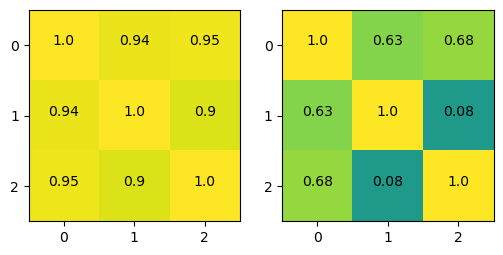

In [13]:
## visualize the matrices

fig,ax = plt.subplots(1,2,figsize=(6,3))

# raw correlations matrix - left plot
ax[0].imshow(cormatR.values,vmin=-1,vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_yticks(range(3))

# add text 
for i in range(3):
    for j in range(3):
        ax[0].text(i,j,np.round(cormatR.values[i,j],2), horizontalalignment='center')

        
        
# partial correlations - right plot
partialCorMat = df.pcorr()
ax[1].imshow(partialCorMat.values,vmin=-1,vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_yticks(range(3))

# show the values as text in the grid squares
for i in range(3):
    for j in range(3):
        # first two args are what coord in grid to put text
        # the second arg is what text to display (partial rs here)
        ax[1].text(i,j,np.round(partialCorMat.values[i,j],2), horizontalalignment='center')


plt.show()